# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [157]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.getcwd()

'/Users/gwynethvolkmann/Desktop/datascience/unit6'

In [158]:
path = '/Users/gwynethvolkmann/Desktop/datascience/unit6'
os.chdir(path)

In [159]:
os.getcwd()

'/Users/gwynethvolkmann/Desktop/datascience/unit6'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [160]:
df = pd.read_csv('step3_output_v2.csv')
df.head()

,Unnamed: 0,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,2
4,4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,2


In [161]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,2
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,2


In [162]:
state_dummy = pd.get_dummies(df['state'])

In [163]:
df = pd.concat([df,state_dummy], axis=1)

In [164]:
df.drop(['state'], axis=1, inplace=True)
df.head()

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,9200,0,0.0,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [165]:
from sklearn import preprocessing
X = df.drop(['Name','AdultWeekend'], axis=1)
y = df['AdultWeekend']
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 

In [166]:
from sklearn.model_selection import train_test_split
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [167]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [168]:
y_pred = model.predict(X_test)
print(y_pred)

[ 59.00819044  89.51966505  78.90320997  76.99329786  69.7669795
  76.17567091  46.51746778  47.63758497  94.75037794  83.56531934
  51.59412794  78.98768262  51.40565137  71.74793653  63.27918653
  93.32020216  35.80213575  72.65028028  61.85877637  41.75989942
 113.94129591  35.31257276  53.7044795   49.26746778  46.75233106
  62.61219434  78.16883497  81.37195997  64.31531934  64.92860059
  35.25672559  61.88953809  80.01551466  57.19422559  75.78626661
  49.41590528  21.51282911  30.06470899  63.30360059  36.44837598
  46.26942091  61.45692091  86.61317091  72.48914747  72.24403028
  58.056042    62.63856153 163.25574903  39.82313184  61.51844434
  70.17176466  59.23426466  53.32899122  45.03504591  59.39899854
  42.50281934  87.60633497  38.19129591 119.26746778 119.20985059
  55.03211622  56.91492872  42.10535841  79.86903028  65.8294795
  41.79139356  37.92908887  97.5001338   62.26404981  25.36805372
  69.02283887 148.99110059  58.45154981  62.49207716  76.40223341
  71.5125849

In [169]:
explained_variance_score(y_test, y_pred)

0.9276893295089197

In [170]:
mean_absolute_error(y_test, y_pred)

5.208054575717134

In [171]:
model.intercept_

64.14930371830994

In [172]:
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

,Coefficient
summit_elev,2.090934e+01
vertical_drop,6.431931e+00
base_elev,1.917916e+01
trams,6.874200e+11
fastEight,6.758012e+10
fastSixes,8.000440e+11
fastQuads,2.698744e+12
quad,1.610982e+12
triple,1.987731e+12
double,2.228226e+12


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [173]:
bigm_row = df[df['Name'].str.contains('Big Mountain')]

In [174]:
bigm = df[df['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend'], axis=1)

In [175]:
print(bigm)

     summit_elev  vertical_drop  base_elev  trams  fastEight  fastSixes  \
151         6817           2353       4464      0        0.0          0   

     fastQuads  quad  triple  double  ...  Rhode Island  South Dakota  \
151          3     2       6       0  ...             0             0   

     Tennessee  Utah  Vermont  Virginia  Washington  West Virginia  Wisconsin  \
151          0     0        0         0           0              0          0   

     Wyoming  
151        0  

[1 rows x 59 columns]


In [190]:
scaler = preprocessing.StandardScaler().fit(bigm)
X_scaled2=scaler.transform(bigm)

In [191]:
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [192]:
print(model.predict(X_scaled2))

[64.14930372]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [193]:
print(df.iloc[151].loc['AdultWeekend'])

81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

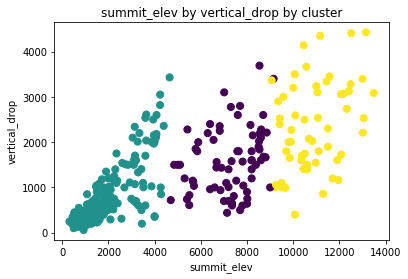

In [194]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

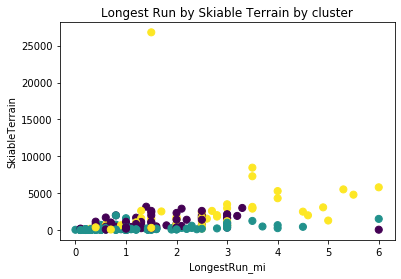

In [197]:
plt.scatter(df['LongestRun_mi'], df['SkiableTerrain_ac'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('LongestRun_mi')
plt.ylabel('SkiableTerrain')
plt.title('Longest Run by Skiable Terrain by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

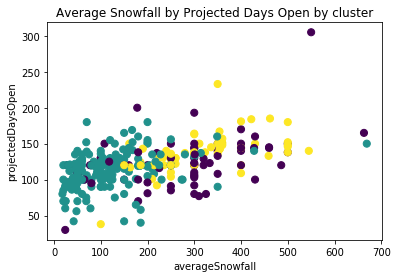

In [200]:
plt.scatter(df['averageSnowfall'], df['projectedDaysOpen'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('averageSnowfall')
plt.ylabel('projectedDaysOpen')
plt.title('Average Snowfall by Projected Days Open by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [0]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [0]:
pd.Dataframe